## Get some images and import packages

In [9]:
if True:      #A weird trick needed for Google Colab
  # Clone repository with example images (this is from last year)
  !rm -rf fyp2022-imaging
  !git clone https://github.com/vcheplygina/fyp2022-imaging.git





'rm' is not recognized as an internal or external command,
operable program or batch file.
fatal: destination path 'fyp2022-imaging' already exists and is not an empty directory.


# Explore an image from the dataset

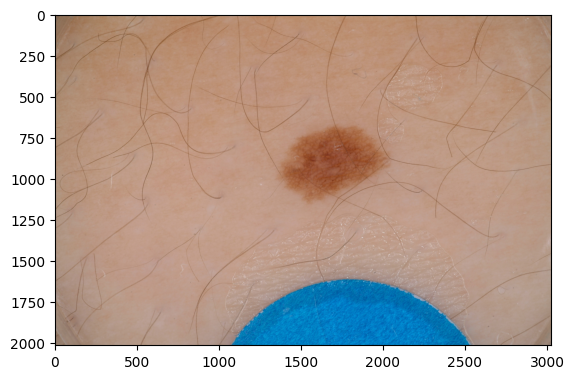

In [10]:
# Load an image and display it

import numpy as np
import matplotlib.pyplot as plt

file_im = 'fyp2022-imaging/data/example_image/ISIC_0001769.jpg'

im = plt.imread(file_im)
plt.imshow(im)

In [11]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)



(2016, 3024, 3)
uint8


In [12]:
#What kind of values are inside?

print(np.min(im))
print(np.max(im))


pixel = im[100,100,:]
print(pixel)

#Can we display this pixel?




0
255
[157 118  87]


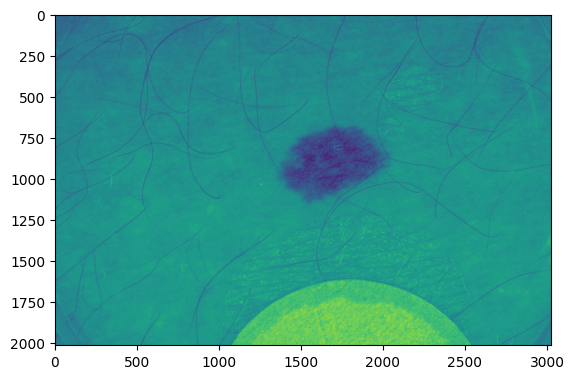

In [13]:
# Show different channels

im2 = im[:,:,2]
plt.imshow(im2)

# Why is the blue marker now yellow? 



In [14]:
# Remove a channel

im2[:,:,2] = im[:,:,2] * 0
plt.imshow(im2)



ValueError: assignment destination is read-only

[  4 151 218]


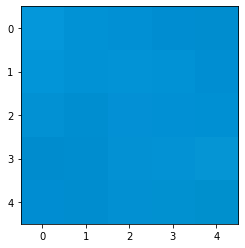

In [ ]:
# Show only part of the image (blue marker)


# Define location
loc_x = 1950
loc_y = 2000

# Get a single RGB value 
print(im[loc_x,loc_y,:])

# Show 5x5 part of the image
part = 5
im_part = im[loc_x:loc_x+part,loc_y:loc_y+part,:]
plt.imshow(im_part)



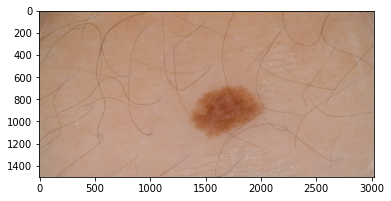

In [ ]:
# Image without marker

im2 = im[0:1500,:,:]
plt.imshow(im2)



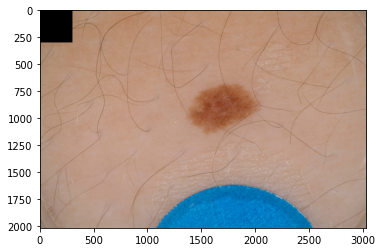

In [ ]:
#Modify an image

im2 = im.copy()

#Create a black square
black_corner_size = 300
black_corner = np.zeros([black_corner_size,black_corner_size,3])

#Same effect, but can create more complex images with np.tile()
#black_corner = np.tile(0, [black_corner_size, black_corner_size, 3])

#Put it into the left corner of the image
im2[0:black_corner_size,0:black_corner_size,:] = black_corner
plt.imshow(im2)


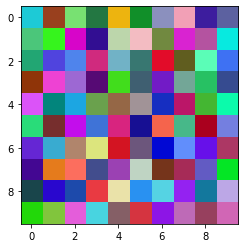

In [ ]:
#Create a color image from scratch

rand_im = np.random.randint(0,255,size=[10,10,3])
plt.imshow(rand_im)



# Explore the segmentation mask

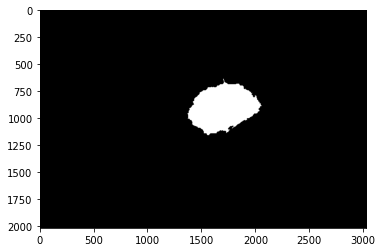

In [ ]:
# Load the mask and display it

mask=plt.imread('fyp2022-imaging/data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')


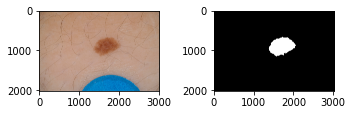

In [ ]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

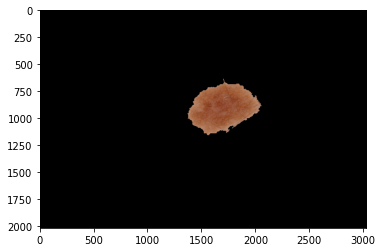

In [ ]:
# Use mask to only see the lesion

im2 = im.copy()
im2[mask==0] = 0
  
# Display 
plt.imshow(im2)


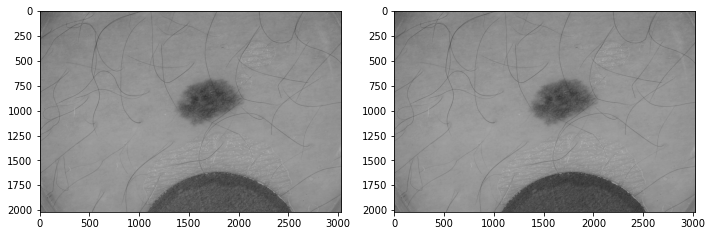

In [ ]:
# Converting RGB to grayscale

from skimage.color import rgb2gray


def my_rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

im = plt.imread('fyp2022-imaging/data/example_image/ISIC_0001769.jpg')
gray = rgb2gray(im)
gray2 = my_rgb2gray(im)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].imshow(gray,cmap='gray')
axes[1].imshow(gray2, cmap='gray')
fig.tight_layout()


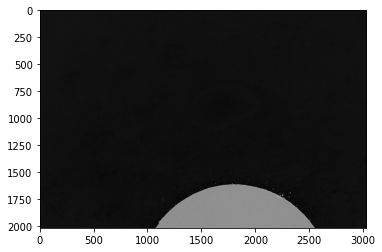

In [ ]:
# Different color representation

from skimage.color import rgb2hsv

hsv_im = rgb2hsv(im)
plt.imshow(hsv_im[:,:,0], cmap='gray')


